In [1]:
import torch
from sklearn.model_selection import train_test_split

### Function split_data

In [2]:
def split_data(x_data, y_data, test_percent=0.20, seed=42):
        """
        The method split_data(), which belongs to the class Model, receives four parameters:

        - x_data: Samples (torch.Tensor).
        - y_data: Targets of the samples (torch.Tensor).
        - test_percent: Percentage of total data employed for testing (default = 0.20).
        - seed:         Used to replicate the resulting training and evaluation sets (default = None).

        And it is going to return two sets one for training and one for testing (each of which contains is divided into samples and targets).
        """

        x_numpy = x_data.cpu().numpy()
        y_numpy = y_data.cpu().numpy()

        X_train, X_test, y_train, y_test = train_test_split(x_numpy, y_numpy, test_size=test_percent, random_state=seed)
        
        return torch.from_numpy(X_train).float().cuda(), torch.from_numpy(X_test).float().cuda(), torch.from_numpy(y_train).long().cuda(), torch.from_numpy(y_test).long().cuda()

In [12]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, Y = mnist["data"], mnist["target"]

X_t = torch.from_numpy(X).float().cuda()
Y_t = torch.from_numpy(Y.astype(int)).long().cuda()

X_train, X_test, y_train, y_test = split_data(X_t, Y_t)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

torch.Size([56000, 784])
torch.Size([56000])
torch.Size([14000, 784])
torch.Size([14000])


Target: 3


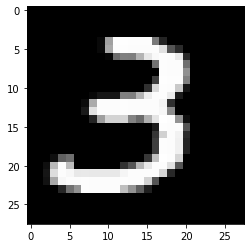

In [36]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

num_sample = 850

sample = X_train[num_sample].cpu().numpy()
target = y_train[num_sample].cpu().numpy()

print('Target: {}'.format(target))

img = Image.fromarray(sample.reshape(28,28))
plt.imshow(img)

### Function get_accuracy

In [ ]:
def get_accuracy(model, x_data, y_data):
        """
        This method receives a set of samples (x_data), with their respective targets (y_data), and gets the accuracy of the model.
        """

        num_correct = 0
        num_samples = len(y_data)
        model.eval()
        
        with torch.no_grad():
            for x_sample, y_sample in zip(x_data, y_data):
                
                scores = model(x_sample)
                _, predictions = scores.max(1)
                num_correct += (predictions == y_sample).sum()
            
            return (num_correct/num_samples)*100
        

In [14]:
import torchvision.models as models

model = models.efficientnet_b0(pretrained=True)

In [19]:
model(X_train)

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [56000, 784]